# TP3 - Champ magnétique

## ARGUELLO Camilo

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display, Math

#### Champ créé par une ou deux bobines

In [15]:
# Mesures
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]) # cm
B = np.array([1.09, 1.15, 1.20, 1.24, 1.25, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.25, 1.25]) # mT

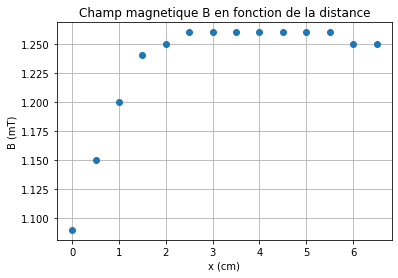

In [16]:
# Champ magnetique B en fonction de la distance

plt.plot(x, B, 'o')
plt.xlabel('x (cm)')
plt.ylabel('B (mT)')
plt.title('Champ magnetique B en fonction de la distance')
plt.grid()
plt.show()

#### Dépendance en I du champ magnétique

In [17]:
# Constantes
N = 95
a = 6.5 # cm

In [18]:
# Valeurs de I entre 0 à 1.5 A
I = np.array([0, 0.20, 0.40, 0.60, 0.80, 1, 1.2, 1.4, 1.5 ])
B = np.array([0, 0.25, 0.51, 0.76, 1.02, 1.28, 1.53, 1.80, 1.92 ])

# Incertitudes sur B et I (dans la notice)
# delta I = 5mA +1% de la valeur
delta_I = 0.005 + 0.01 * I

# delta_B = 0.03 mT + 3% de la valeur mesurée
delta_B = 0.03 + 0.03 * B

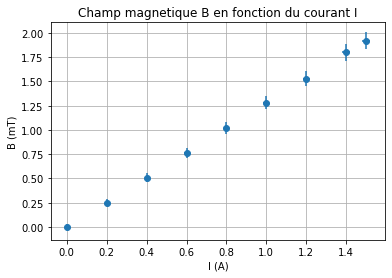

In [19]:
plt.errorbar(I, B, xerr=delta_I, yerr=delta_B, fmt='o')
plt.xlabel('I (A)')
plt.ylabel('B (mT)')
plt.title('Champ magnetique B en fonction du courant I')
plt.grid()
plt.show()

#### Détermination de la relation entre $e(t)$ et $B(t)$

In [28]:
v_0 = np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]) # KHz
U_eff = np.array([7.94,9.84,14.3,17.8,22.4,24.9,29.7,32.4,36.8,41.8,45.5,48.9]) # mV
e_0 = U_eff * np.sqrt(2) # mV

<IPython.core.display.Math object>

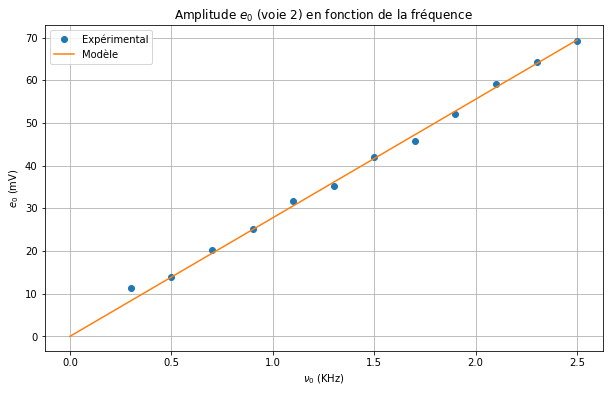

In [31]:
# Modèle d'après e(t) = k d(\phi) / dt
def model(params, v_0):
    k = params[0]
    return k * v_0
  
def cost_function(params, v_0, e_0):
    return np.sum((model(params, v_0) - e_0)**2)
  
params = minimize(cost_function, [1], args=(v_0, e_0)).x
display(Math('k = %.2f' % params[0]))

x = np.linspace(0, 2.5, 100)
y = model(params, x)

# e_0 en fonction v_0
plt.figure(figsize=(10, 6))
plt.plot(v_0, e_0, 'o', label="Expérimental")
plt.plot(x, y, label="Modèle")
plt.xlabel('$\\nu_0$ (KHz)')
plt.ylabel('$e_0$ (mV)')
plt.title('Amplitude $e_0$ (voie 2) en fonction de la fréquence')
plt.grid()
plt.legend()
plt.show()